### Resources used:

- https://www.tensorflow.org/alpha/tutorials/quickstart/beginner

In [2]:
%load_ext tensorboard.notebook

The tensorboard.notebook extension is already loaded. To reload it, use:
  %reload_ext tensorboard.notebook


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt 

%matplotlib inline

import numpy as np
np.random.seed(7)

In [4]:
print(tf.__version__)

2.0.0-alpha0


In [5]:
fashion_mnist = mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

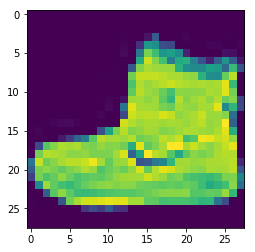

Class label 9


In [9]:
plt.imshow(x_train[0])
plt.show()

print('Class label {}'.format(y_train[0]))

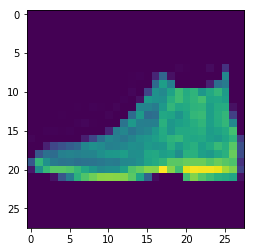

Class label 9


In [11]:
plt.imshow(x_test[0])
plt.show()

print('Class label {}'.format(y_test[0]))

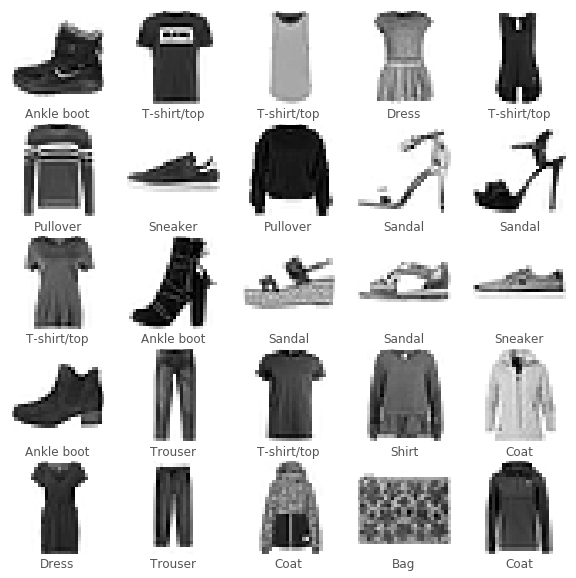

In [88]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [102]:
from collections import Counter
import pandas as pd

In [107]:
print('Distribution of the class labels in the training set:')
pd.DataFrame(Counter(y_train).most_common(), columns=['Label', '#'])

Distribution of the class labels in the training set:


,Label,#
0,9,6000
1,0,6000
2,3,6000
3,2,6000
4,7,6000
5,5,6000
6,1,6000
7,6,6000
8,4,6000
9,8,6000


In [108]:
print('Distribution of the class labels in the testing set:')
pd.DataFrame(Counter(y_test).most_common(), columns=['Label', '#'])

Distribution of the class labels in the testing set:


,Label,#
0,9,1000
1,2,1000
2,1,1000
3,6,1000
4,4,1000
5,5,1000
6,7,1000
7,3,1000
8,8,1000
9,0,1000


In [89]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
h = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.5874 - accuracy: 0.7967 - val_loss: 0.4479 - val_accuracy: 0.8420
Epoch 2/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4251 - accuracy: 0.8493 - val_loss: 0.4248 - val_accuracy: 0.8465
Epoch 3/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3810 - accuracy: 0.8635 - val_loss: 0.3811 - val_accuracy: 0.8655
Epoch 4/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3567 - accuracy: 0.8712 - val_loss: 0.3696 - val_accuracy: 0.8667
Epoch 5/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3385 - accuracy: 0.8777 - val_loss: 0.3567 - val_accuracy: 0.8716


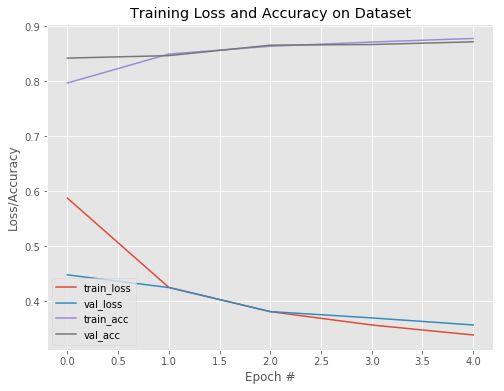

In [126]:
def plot_acc_loss(N, h):
    plt.style.use("ggplot")
    plt.figure(figsize=(8,6))
    plt.plot(np.arange(0, N), h.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), h.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, N), h.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, N), h.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy on Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.show()
    
plot_acc_loss(5, h)

In [28]:
predictions = model.predict(x_test)

In [5]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],\
                                100*np.max(predictions_array),\
                                class_names[true_label]),\
                                color=color)

In [82]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

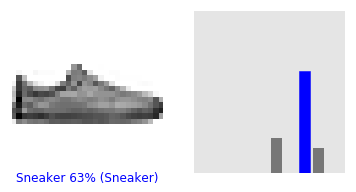

In [83]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(12, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(12, predictions,  y_test)
plt.show()

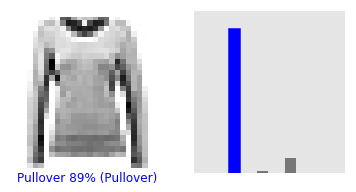

In [84]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(110, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(110, predictions,  y_test)
plt.show()

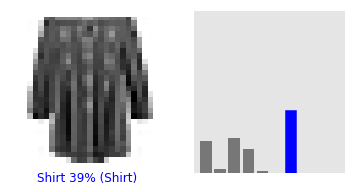

In [85]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(512, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(512, predictions,  y_test)
plt.show()

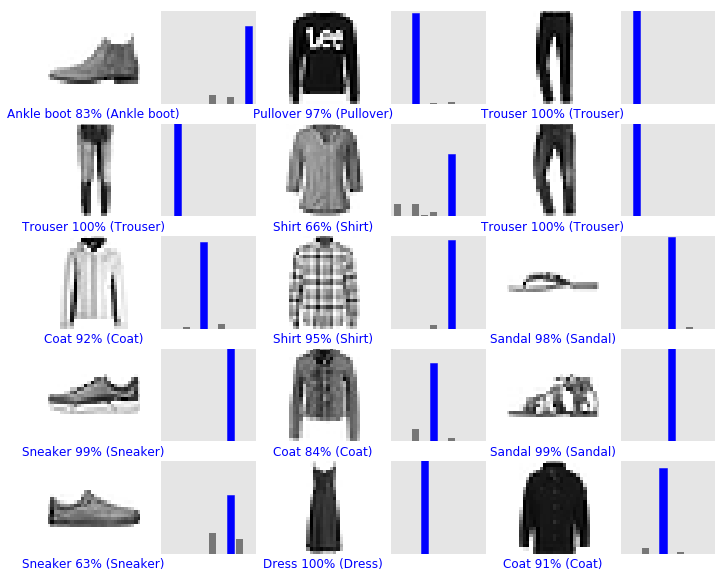

In [77]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)
plt.show()

In [95]:
img = np.expand_dims(x_test[270],0)
predictions_single = model.predict(img)

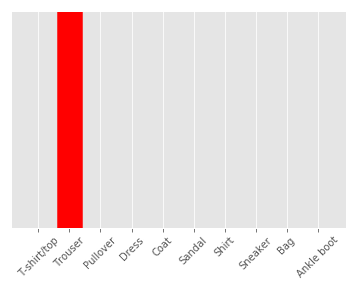

In [97]:
plot_value_array(0, predictions_single, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

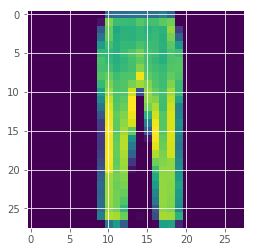

Class label: 1


In [100]:
plt.imshow(x_test[270])
plt.show()

print('Class label: {}'.format(y_test[270]))

## CNNs

In [6]:
x_train  = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [7]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

In [9]:
# Clear out prior logging data.
!rm -rf logs/

In [8]:
import itertools
def plot_confusion_matrix(cm, class_names):

    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

In [10]:
from datetime import datetime

logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')

In [11]:
import io

def plot_to_image(figure):
    """Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call."""
    # Save the plot to a PNG in memory.
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    # Convert PNG buffer to TF image
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    # Add the batch dimension
    image = tf.expand_dims(image, 0)
    return image

In [12]:
from sklearn.metrics import confusion_matrix

def log_confusion_matrix(epoch, logs):
    # Use the model to predict the values from the validation dataset.
    test_pred_raw = model.predict(x_test)
    test_pred = np.argmax(test_pred_raw, axis=1)

    # Calculate the confusion matrix.
    cm = confusion_matrix(y_test, test_pred)
    # Log the confusion matrix as an image summary.
    figure = plot_confusion_matrix(cm, class_names=class_names)
    cm_image = plot_to_image(figure)

    # Log the confusion matrix as an image summary.
    with file_writer_cm.as_default():
        tf.summary.image("Confusion Matrix", cm_image, step=epoch)

# Define the per-epoch callback.
cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu')
])

In [14]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Start TensorBoard
%tensorboard --logdir logs/

model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=5, batch_size=128,
          verbose=0, 
          callbacks=[tensorboard_callback, cm_callback])

Reusing TensorBoard on port 6006 (pid 22444), started 0:05:12 ago. (Use '!kill 22444' to kill it.)

The confusion matrix in the TensorBoard looks dope - 

https://www.loom.com/share/95c1f84ff9544923b2a00feb18d1892b

In [19]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 243us/sample - loss: 0.2899 - accuracy: 0.8975


[0.2898574528813362, 0.8975]